# Sensor Data Analysis

This notebook analyzes sensor data collected from March 1-7, 2025. The data includes measurements for:
- Temperature
- Humidity
- Light
- pH
- Electrical Conductivity

## 1. Import Required Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Data

In [26]:
# Load the merged sensor data
df = pd.read_csv('../reports/sensor_data_merged.csv')

print(f"Data loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Data loaded successfully!
Shape: 120960 rows × 6 columns


## 3. Initial Data Exploration

In [ ]:
# Display first few rows
df.head(10)

In [ ]:
# Get information about the dataset
df.info()

In [ ]:
# Statistical summary
df.describe()

## 4. Check for Missing Values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

## 5. Correlation Analysis

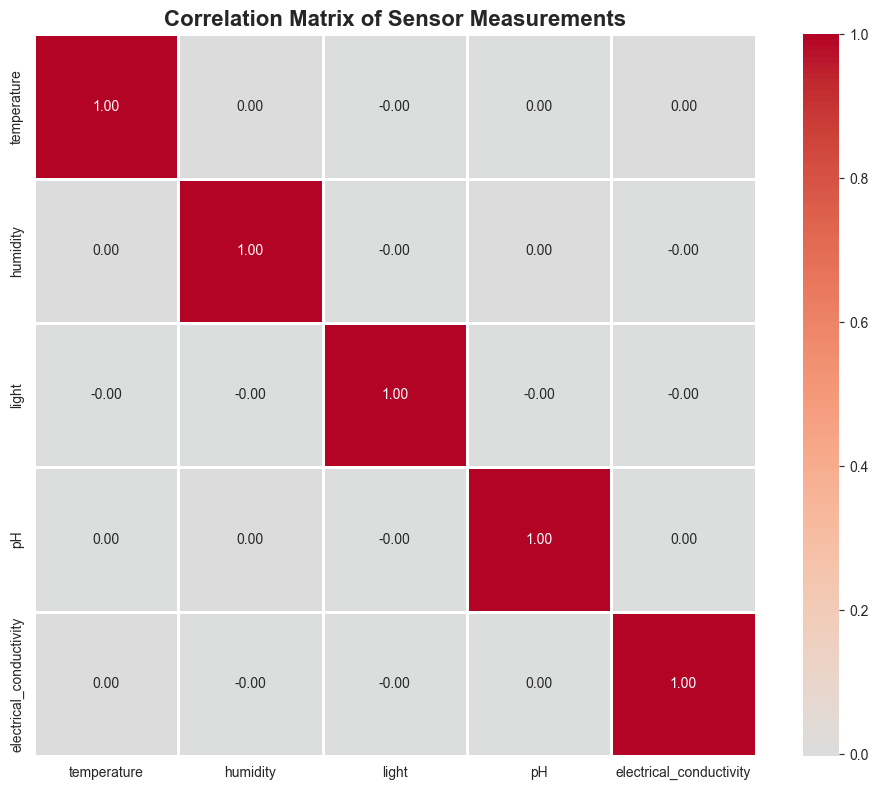


Correlation Matrix:
                         temperature  humidity     light        pH  \
temperature                 1.000000  0.003655 -0.000423  0.000742   
humidity                    0.003655  1.000000 -0.001196  0.001540   
light                      -0.000423 -0.001196  1.000000 -0.002546   
pH                          0.000742  0.001540 -0.002546  1.000000   
electrical_conductivity     0.003117 -0.001568 -0.001242  0.001322   

                         electrical_conductivity  
temperature                             0.003117  
humidity                               -0.001568  
light                                  -0.001242  
pH                                      0.001322  
electrical_conductivity                 1.000000  


In [27]:
# Calculate correlation matrix
correlation_matrix = df[['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix of Sensor Measurements', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

## 6. Distribution Plots

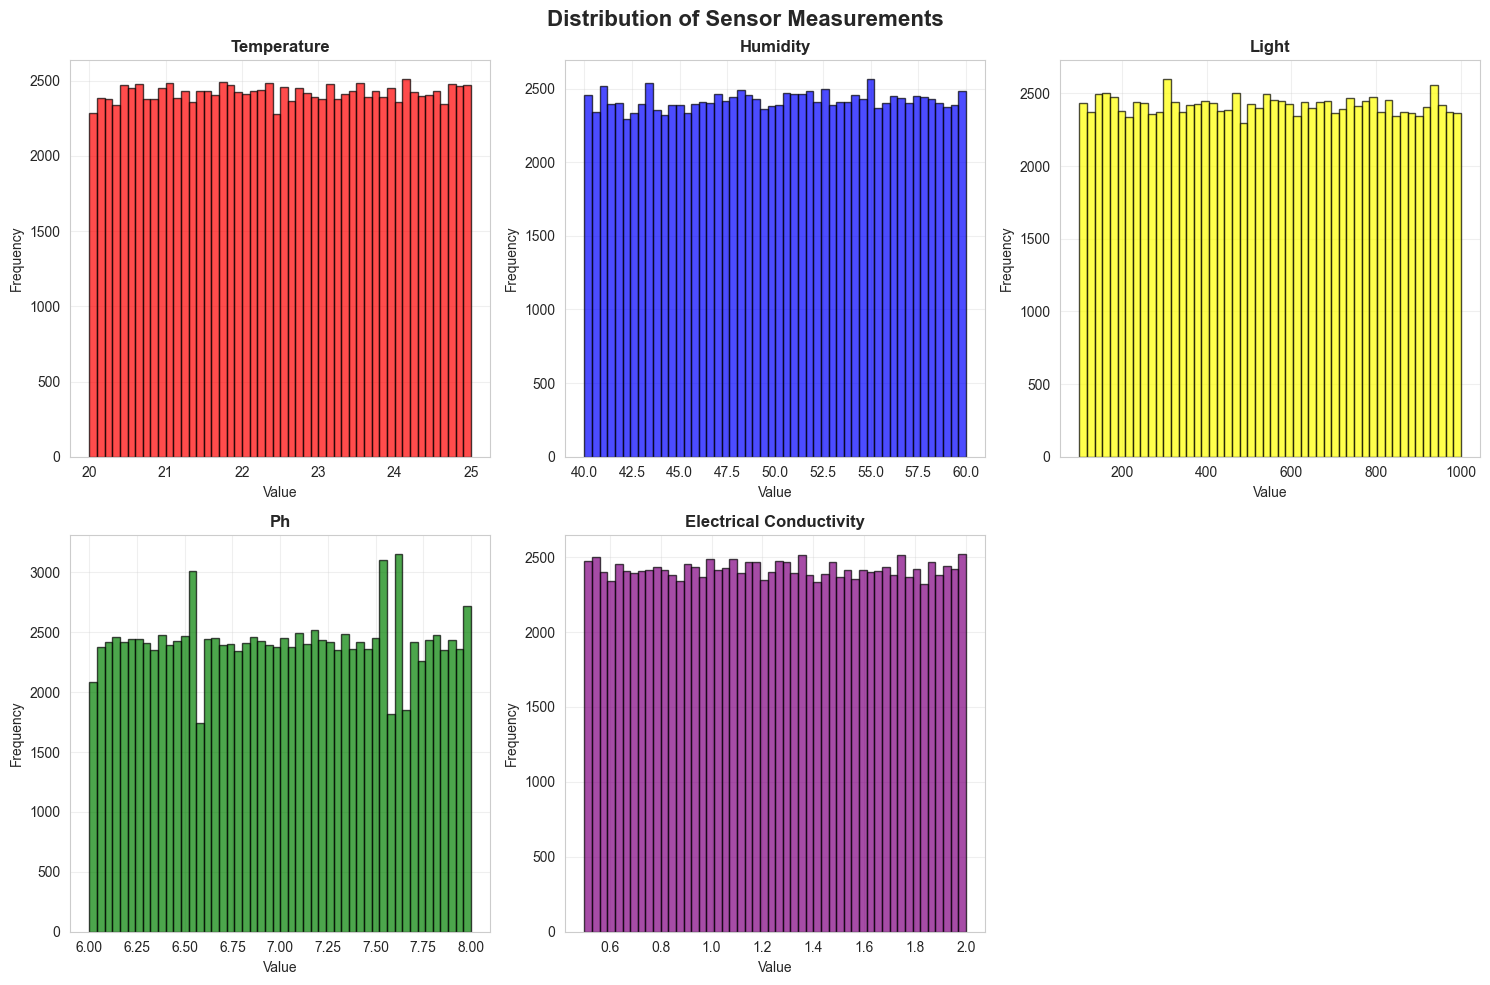

In [28]:
# Distribution plots for all sensor measurements
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Sensor Measurements', fontsize=16, fontweight='bold')

sensors = ['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']
colors = ['red', 'blue', 'yellow', 'green', 'purple']

for idx, (sensor, color) in enumerate(zip(sensors, colors)):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(df[sensor], bins=50, color=color, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'{sensor.replace("_", " ").title()}', fontweight='bold')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True, alpha=0.3)

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()
plt.close()


## 7. Scatter Plot Matrix (Pairplot)

In [ ]:
# Create pairplot to visualize relationships between all variables
pairplot = sns.pairplot(df[['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']], 
                         diag_kind='kde', plot_kws={'alpha': 0.6, 's': 10})
pairplot.fig.suptitle('Pairwise Relationships Between Sensor Measurements', 
                      y=1.02, fontsize=16, fontweight='bold')
plt.show()
plt.close()

## 8. Box Plots for Outlier Detection

In [ ]:
# Box plots to identify outliers
fig, axes = plt.subplots(1, 5, figsize=(18, 4))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold')

sensors = ['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']
colors = ['red', 'blue', 'yellow', 'green', 'purple']

for idx, (sensor, color) in enumerate(zip(sensors, colors)):
    axes[idx].boxplot(df[sensor], patch_artist=True,
                      boxprops=dict(facecolor=color, alpha=0.6),
                      medianprops=dict(color='black', linewidth=2))
    axes[idx].set_title(sensor.replace('_', ' ').title(), fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close

## 9. Time Series Analysis

In [ ]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot time series for all sensors
fig, axes = plt.subplots(5, 1, figsize=(15, 12))
fig.suptitle('Time Series of Sensor Measurements', fontsize=16, fontweight='bold')

sensors = ['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']
colors = ['red', 'blue', 'orange', 'green', 'purple']

for idx, (sensor, color) in enumerate(zip(sensors, colors)):
    axes[idx].plot(df['timestamp'], df[sensor], color=color, alpha=0.7, linewidth=0.5)
    axes[idx].set_title(sensor.replace('_', ' ').title(), fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)
    
axes[-1].set_xlabel('Timestamp')
plt.tight_layout()
plt.show()
plt.close()

## 10. Specific Correlation Scatter Plots

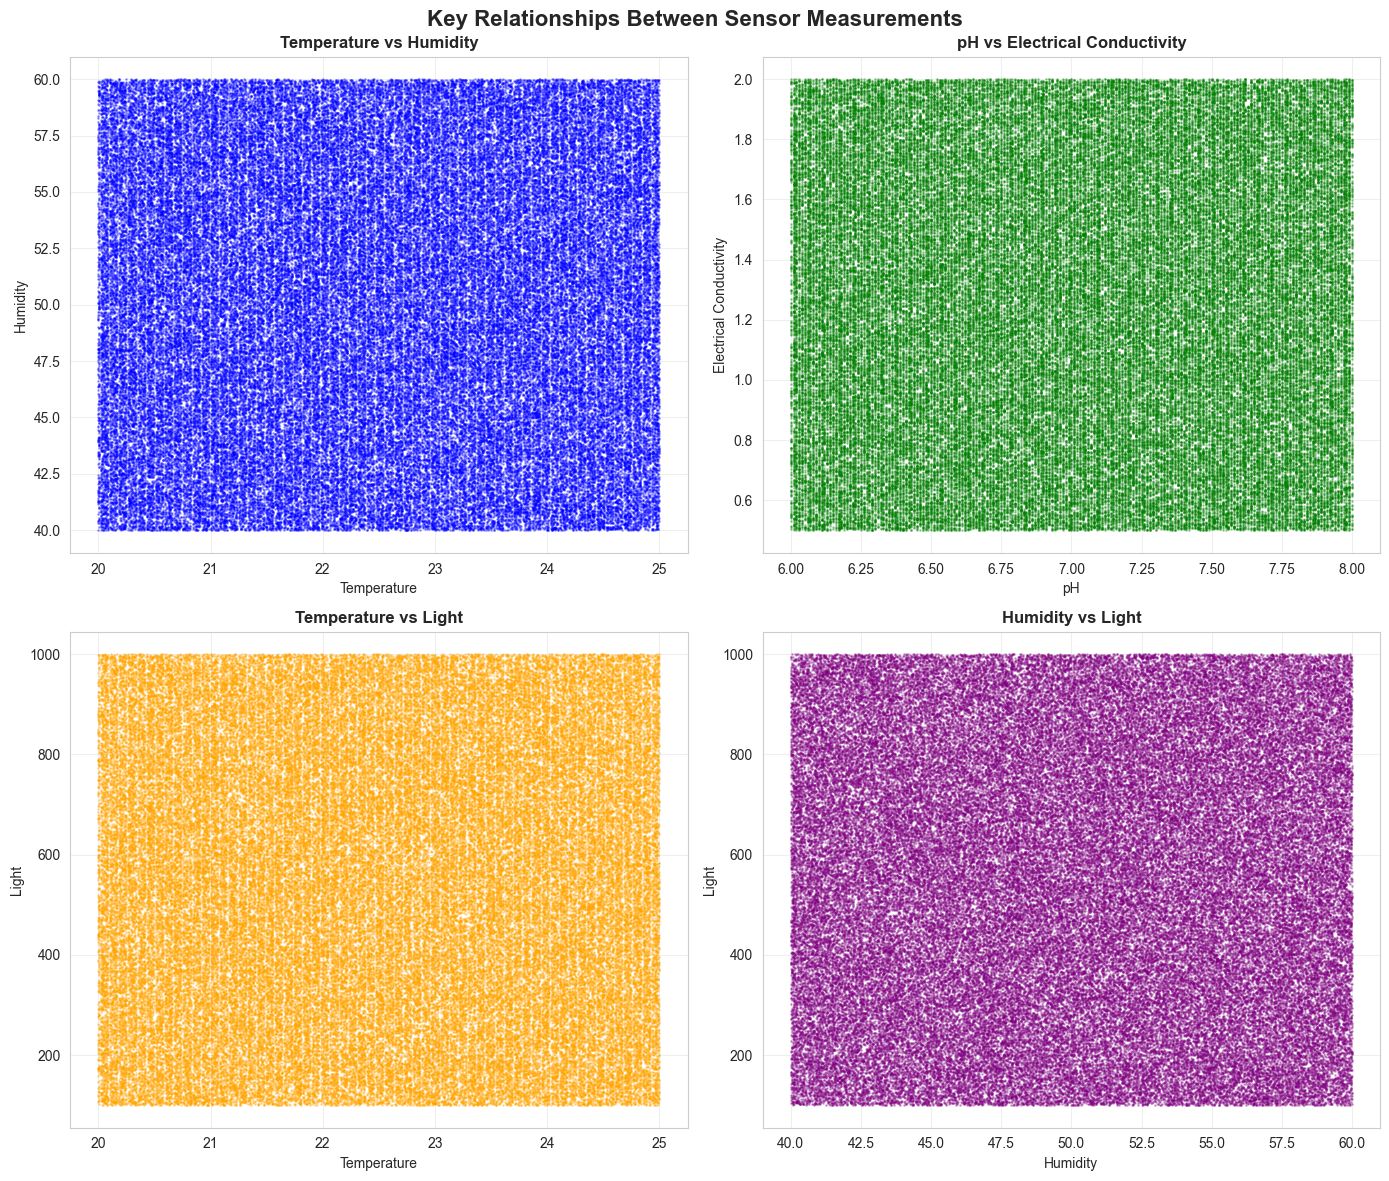

In [29]:
# Create scatter plots for interesting relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Key Relationships Between Sensor Measurements', fontsize=16, fontweight='bold')

# Temperature vs Humidity
axes[0, 0].scatter(df['temperature'], df['humidity'], alpha=0.3, s=1, c='blue')
axes[0, 0].set_xlabel('Temperature')
axes[0, 0].set_ylabel('Humidity')
axes[0, 0].set_title('Temperature vs Humidity', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# pH vs Electrical Conductivity
axes[0, 1].scatter(df['pH'], df['electrical_conductivity'], alpha=0.3, s=1, c='green')
axes[0, 1].set_xlabel('pH')
axes[0, 1].set_ylabel('Electrical Conductivity')
axes[0, 1].set_title('pH vs Electrical Conductivity', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Temperature vs Light
axes[1, 0].scatter(df['temperature'], df['light'], alpha=0.3, s=1, c='orange')
axes[1, 0].set_xlabel('Temperature')
axes[1, 0].set_ylabel('Light')
axes[1, 0].set_title('Temperature vs Light', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Humidity vs Light
axes[1, 1].scatter(df['humidity'], df['light'], alpha=0.3, s=1, c='purple')
axes[1, 1].set_xlabel('Humidity')
axes[1, 1].set_ylabel('Light')
axes[1, 1].set_title('Humidity vs Light', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()